In [3]:
using Pkg
Pkg.add("Plots")
# http://docs.juliaplots.org/latest/tutorial/
using Plots

    Updating registry at `C:\Users\niczk\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\niczk\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\niczk\.julia\environments\v1.7\Manifest.toml`


#### Zadanie 1
Porównać w języku Julia reprezentację bitową liczby 1/3 dla `Float16`, `Float32`, `Float64` oraz liczby, 
która jest inicjalizowana jako `Float16`, a potem rzutowana na `Float64`.

In [4]:
decode16(x::Float16) = (b=bitstring(x); (b[1], b[2:6], b[7:16]))
decode32(x::Float32) = (b=bitstring(x); (b[1], b[2:9], b[10:32]))
decode64(x::Float64) = (b=bitstring(x); (b[1], b[2:12], b[13:64]))

decode64 (generic function with 1 method)

In [5]:
d16 = decode16(Float16(1/3))
d32 = decode32(Float32(1/3))
d64 = decode64(Float64(1/3))

println("dla 16: ", d16)
println("dla 32: ", d32)
println("dla 64: ", d64)

println("16: ", bitstring(Float16(1/3)))
println("32: ", bitstring(Float32(1/3)))
println("64: ", bitstring(Float64(1/3)))
println("16 -> 64: ", bitstring(Float64(Float16(1/3))))
println("32 -> 64: ", bitstring(Float64(Float32(1/3))))

dla 16: ('0', "01101", "0101010101")
dla 32: ('0', "01111101", "01010101010101010101011")
dla 64: ('0', "01111111101", "0101010101010101010101010101010101010101010101010101")
16: 0011010101010101
32: 00111110101010101010101010101011
64: 0011111111010101010101010101010101010101010101010101010101010101
16 -> 64: 0011111111010101010101000000000000000000000000000000000000000000
32 -> 64: 0011111111010101010101010101010101100000000000000000000000000000


kom: kiedy rzutujemy z mniejszego rozmiaru na więszky to nie wiemy co było na "bitach na końcu" dlatego wartość po zrzutowaniu wypełnia się zerami

#### Zadanie 2
Zbadać, jak zmienia się odległość między kolejnymi liczbami zminnoprzecinkowymi reprezentowanymi w komputerze za pomocą języka Julia. Narysować wykres używając Plots zależności odległości od wartości liczby dla zakresu od 1.0 do 1000000.0.

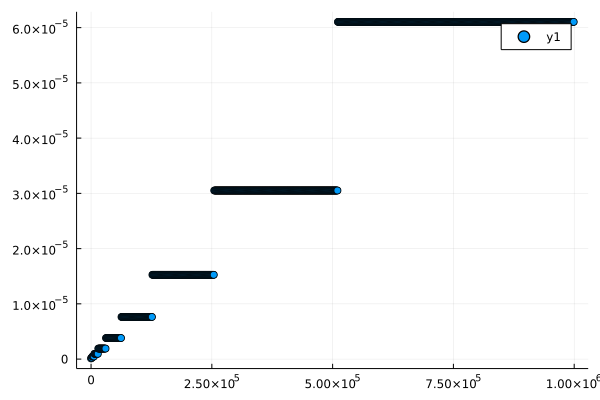

In [6]:
diffs = Float32[]
a = Float32(1.0)
r = 1:1000:1000000
for i = r
    diff = nextfloat(a)-a
    push!(diffs, diff)
    a = a+1
end

using Plots
scatter(1:1000:1000000, diffs)

Pojawiają się "skoki" jak zmienia się cecha - wtedy mantysa jest mnożona x2, im większa cecha tym większa odległość między kolejnymi liczbami

#### Zadanie 3
Jedną z bibliotek numerycznych, jaką będziemy używać na zajęciach jest GSL (język C). Korzystając ze wsparcia dla wyświetlania reprezentacji liczb zmiennoprzecinkowych zobaczyć jak zmienia się cecha i mantysa dla coraz mniejszych liczb. Zaobserwować, kiedy mantysa przestaje być znormalizowana i dlaczego?
Kod załączyć jako komórka Markdown sformatowana jako C (link). Wynik także jako Markdown (kod albo fragment zrzutu ekranu).

Kod dla `float`:

```c
#include <stdio.h>
#include <gsl/gsl_ieee_utils.h>
#include <math.h>

int main(void) {
    float a = 1e-33;
    while (a > 0){
        printf("%e ", a);
        gsl_ieee_printf_float(&a);
        printf(" %d \n", isnormal(a));
        a /= 2.0;
    }
    return 0;
}
```

Wynik dla `float` w formacie [liczba, reprezentacja, czy znormalizowana]:

```c
1.000000e-33  1.01001100010011101001100*2^-110 1
5.000000e-34  1.01001100010011101001100*2^-111 1
2.500000e-34  1.01001100010011101001100*2^-112 1
1.250000e-34  1.01001100010011101001100*2^-113 1
6.250000e-35  1.01001100010011101001100*2^-114 1
3.125000e-35  1.01001100010011101001100*2^-115 1
1.562500e-35  1.01001100010011101001100*2^-116 1
7.812500e-36  1.01001100010011101001100*2^-117 1
3.906250e-36  1.01001100010011101001100*2^-118 1
1.953125e-36  1.01001100010011101001100*2^-119 1
9.765625e-37  1.01001100010011101001100*2^-120 1
4.882813e-37  1.01001100010011101001100*2^-121 1
2.441406e-37  1.01001100010011101001100*2^-122 1
1.220703e-37  1.01001100010011101001100*2^-123 1
6.103516e-38  1.01001100010011101001100*2^-124 1
3.051758e-38  1.01001100010011101001100*2^-125 1
1.525879e-38  1.01001100010011101001100*2^-126 1
7.629395e-39  0.10100110001001110100110*2^-126 0
3.814697e-39  0.01010011000100111010011*2^-126 0
1.907349e-39  0.00101001100010011101010*2^-126 0
9.536747e-40  0.00010100110001001110101*2^-126 0
4.768366e-40  0.00001010011000100111010*2^-126 0
2.384183e-40  0.00000101001100010011101*2^-126 0
1.192085e-40  0.00000010100110001001110*2^-126 0
5.960423e-41  0.00000001010011000100111*2^-126 0
2.980282e-41  0.00000000101001100010100*2^-126 0
1.490141e-41  0.00000000010100110001010*2^-126 0
7.450704e-42  0.00000000001010011000101*2^-126 0
3.724651e-42  0.00000000000101001100010*2^-126 0
1.862326e-42  0.00000000000010100110001*2^-126 0
9.304622e-43  0.00000000000001010011000*2^-126 0
4.652311e-43  0.00000000000000101001100*2^-126 0
2.326155e-43  0.00000000000000010100110*2^-126 0
1.163078e-43  0.00000000000000001010011*2^-126 0
5.885454e-44  0.00000000000000000101010*2^-126 0
2.942727e-44  0.00000000000000000010101*2^-126 0
1.401298e-44  0.00000000000000000001010*2^-126 0
7.006492e-45  0.00000000000000000000101*2^-126 0
2.802597e-45  0.00000000000000000000010*2^-126 0
1.401298e-45  0.00000000000000000000001*2^-126 0
```

*W tym zapisie widać że do pewnego momentu zmienia się jedynie cecha - zmniejsza o 1, a mantysa pozostaje taka sama, następnie gdy osiąga -126 (limit dla cechy w tym formacie) więc liczba staje się zdenormalizowana i cecha zostaje na -126 a mantysa zaczyna się "przesuwać". Wtedy też "ucina" bity z końca tej liczby i wstawia 0 na początku, przez co nie wiemy co by było "dalej" gdyby cecha była mniejsza.*

Dodatkowo analogiczny kod dla `double`:

```c
#include <stdio.h>
#include <gsl/gsl_ieee_utils.h>
#include <math.h>

int main(void) {
    double a = 1e-33;
    while (a > 0){
        printf("%e ", a);
        gsl_ieee_printf_double(&a);
        printf(" %d \n", isnormal(a));
        a /= 2.0;
    }
    return 0;
}
```

I jego wynik:

```c
1.000000e-33  1.0100110001001110100101110111101110100001111101011100*2^-110 1
5.000000e-34  1.0100110001001110100101110111101110100001111101011100*2^-111 1
2.500000e-34  1.0100110001001110100101110111101110100001111101011100*2^-112 1
1.250000e-34  1.0100110001001110100101110111101110100001111101011100*2^-113 1
6.250000e-35  1.0100110001001110100101110111101110100001111101011100*2^-114 1
3.125000e-35  1.0100110001001110100101110111101110100001111101011100*2^-115 1
1.562500e-35  1.0100110001001110100101110111101110100001111101011100*2^-116 1
7.812500e-36  1.0100110001001110100101110111101110100001111101011100*2^-117 1
3.906250e-36  1.0100110001001110100101110111101110100001111101011100*2^-118 1
1.953125e-36  1.0100110001001110100101110111101110100001111101011100*2^-119 1
9.765625e-37  1.0100110001001110100101110111101110100001111101011100*2^-120 1
4.882813e-37  1.0100110001001110100101110111101110100001111101011100*2^-121 1
2.441406e-37  1.0100110001001110100101110111101110100001111101011100*2^-122 1
1.220703e-37  1.0100110001001110100101110111101110100001111101011100*2^-123 1
6.103516e-38  1.0100110001001110100101110111101110100001111101011100*2^-124 1
3.051758e-38  1.0100110001001110100101110111101110100001111101011100*2^-125 1
1.525879e-38  1.0100110001001110100101110111101110100001111101011100*2^-126 1
7.629395e-39  1.0100110001001110100101110111101110100001111101011100*2^-127 1
3.814697e-39  1.0100110001001110100101110111101110100001111101011100*2^-128 1
1.907349e-39  1.0100110001001110100101110111101110100001111101011100*2^-129 1
9.536743e-40  1.0100110001001110100101110111101110100001111101011100*2^-130 1
4.768372e-40  1.0100110001001110100101110111101110100001111101011100*2^-131 1
2.384186e-40  1.0100110001001110100101110111101110100001111101011100*2^-132 1
1.192093e-40  1.0100110001001110100101110111101110100001111101011100*2^-133 1
5.960464e-41  1.0100110001001110100101110111101110100001111101011100*2^-134 1
2.980232e-41  1.0100110001001110100101110111101110100001111101011100*2^-135 1
1.490116e-41  1.0100110001001110100101110111101110100001111101011100*2^-136 1
7.450581e-42  1.0100110001001110100101110111101110100001111101011100*2^-137 1
3.725290e-42  1.0100110001001110100101110111101110100001111101011100*2^-138 1
1.862645e-42  1.0100110001001110100101110111101110100001111101011100*2^-139 1
9.313226e-43  1.0100110001001110100101110111101110100001111101011100*2^-140 1
4.656613e-43  1.0100110001001110100101110111101110100001111101011100*2^-141 1
2.328306e-43  1.0100110001001110100101110111101110100001111101011100*2^-142 1
1.164153e-43  1.0100110001001110100101110111101110100001111101011100*2^-143 1
5.820766e-44  1.0100110001001110100101110111101110100001111101011100*2^-144 1
2.910383e-44  1.0100110001001110100101110111101110100001111101011100*2^-145 1
1.455192e-44  1.0100110001001110100101110111101110100001111101011100*2^-146 1
7.275958e-45  1.0100110001001110100101110111101110100001111101011100*2^-147 1
3.637979e-45  1.0100110001001110100101110111101110100001111101011100*2^-148 1
1.818989e-45  1.0100110001001110100101110111101110100001111101011100*2^-149 1
9.094947e-46  1.0100110001001110100101110111101110100001111101011100*2^-150 1
4.547474e-46  1.0100110001001110100101110111101110100001111101011100*2^-151 1
2.273737e-46  1.0100110001001110100101110111101110100001111101011100*2^-152 1
1.136868e-46  1.0100110001001110100101110111101110100001111101011100*2^-153 1
5.684342e-47  1.0100110001001110100101110111101110100001111101011100*2^-154 1
2.842171e-47  1.0100110001001110100101110111101110100001111101011100*2^-155 1
1.421085e-47  1.0100110001001110100101110111101110100001111101011100*2^-156 1
7.105427e-48  1.0100110001001110100101110111101110100001111101011100*2^-157 1
3.552714e-48  1.0100110001001110100101110111101110100001111101011100*2^-158 1
1.776357e-48  1.0100110001001110100101110111101110100001111101011100*2^-159 1
8.881784e-49  1.0100110001001110100101110111101110100001111101011100*2^-160 1
4.440892e-49  1.0100110001001110100101110111101110100001111101011100*2^-161 1
2.220446e-49  1.0100110001001110100101110111101110100001111101011100*2^-162 1
1.110223e-49  1.0100110001001110100101110111101110100001111101011100*2^-163 1
5.551115e-50  1.0100110001001110100101110111101110100001111101011100*2^-164 1
2.775558e-50  1.0100110001001110100101110111101110100001111101011100*2^-165 1
1.387779e-50  1.0100110001001110100101110111101110100001111101011100*2^-166 1
6.938894e-51  1.0100110001001110100101110111101110100001111101011100*2^-167 1
3.469447e-51  1.0100110001001110100101110111101110100001111101011100*2^-168 1
1.734723e-51  1.0100110001001110100101110111101110100001111101011100*2^-169 1
8.673617e-52  1.0100110001001110100101110111101110100001111101011100*2^-170 1
4.336809e-52  1.0100110001001110100101110111101110100001111101011100*2^-171 1
2.168404e-52  1.0100110001001110100101110111101110100001111101011100*2^-172 1
1.084202e-52  1.0100110001001110100101110111101110100001111101011100*2^-173 1
5.421011e-53  1.0100110001001110100101110111101110100001111101011100*2^-174 1
2.710505e-53  1.0100110001001110100101110111101110100001111101011100*2^-175 1
1.355253e-53  1.0100110001001110100101110111101110100001111101011100*2^-176 1
6.776264e-54  1.0100110001001110100101110111101110100001111101011100*2^-177 1
3.388132e-54  1.0100110001001110100101110111101110100001111101011100*2^-178 1
1.694066e-54  1.0100110001001110100101110111101110100001111101011100*2^-179 1
8.470329e-55  1.0100110001001110100101110111101110100001111101011100*2^-180 1
4.235165e-55  1.0100110001001110100101110111101110100001111101011100*2^-181 1
2.117582e-55  1.0100110001001110100101110111101110100001111101011100*2^-182 1
1.058791e-55  1.0100110001001110100101110111101110100001111101011100*2^-183 1
5.293956e-56  1.0100110001001110100101110111101110100001111101011100*2^-184 1
2.646978e-56  1.0100110001001110100101110111101110100001111101011100*2^-185 1
1.323489e-56  1.0100110001001110100101110111101110100001111101011100*2^-186 1
6.617445e-57  1.0100110001001110100101110111101110100001111101011100*2^-187 1
3.308722e-57  1.0100110001001110100101110111101110100001111101011100*2^-188 1
1.654361e-57  1.0100110001001110100101110111101110100001111101011100*2^-189 1
8.271806e-58  1.0100110001001110100101110111101110100001111101011100*2^-190 1
4.135903e-58  1.0100110001001110100101110111101110100001111101011100*2^-191 1
2.067952e-58  1.0100110001001110100101110111101110100001111101011100*2^-192 1
1.033976e-58  1.0100110001001110100101110111101110100001111101011100*2^-193 1
5.169879e-59  1.0100110001001110100101110111101110100001111101011100*2^-194 1
2.584939e-59  1.0100110001001110100101110111101110100001111101011100*2^-195 1
1.292470e-59  1.0100110001001110100101110111101110100001111101011100*2^-196 1
6.462349e-60  1.0100110001001110100101110111101110100001111101011100*2^-197 1
3.231174e-60  1.0100110001001110100101110111101110100001111101011100*2^-198 1
1.615587e-60  1.0100110001001110100101110111101110100001111101011100*2^-199 1
8.077936e-61  1.0100110001001110100101110111101110100001111101011100*2^-200 1
4.038968e-61  1.0100110001001110100101110111101110100001111101011100*2^-201 1
2.019484e-61  1.0100110001001110100101110111101110100001111101011100*2^-202 1
1.009742e-61  1.0100110001001110100101110111101110100001111101011100*2^-203 1
5.048710e-62  1.0100110001001110100101110111101110100001111101011100*2^-204 1
2.524355e-62  1.0100110001001110100101110111101110100001111101011100*2^-205 1
1.262177e-62  1.0100110001001110100101110111101110100001111101011100*2^-206 1
6.310887e-63  1.0100110001001110100101110111101110100001111101011100*2^-207 1
3.155444e-63  1.0100110001001110100101110111101110100001111101011100*2^-208 1
1.577722e-63  1.0100110001001110100101110111101110100001111101011100*2^-209 1
7.888609e-64  1.0100110001001110100101110111101110100001111101011100*2^-210 1
3.944305e-64  1.0100110001001110100101110111101110100001111101011100*2^-211 1
1.972152e-64  1.0100110001001110100101110111101110100001111101011100*2^-212 1
9.860761e-65  1.0100110001001110100101110111101110100001111101011100*2^-213 1
4.930381e-65  1.0100110001001110100101110111101110100001111101011100*2^-214 1
2.465190e-65  1.0100110001001110100101110111101110100001111101011100*2^-215 1
1.232595e-65  1.0100110001001110100101110111101110100001111101011100*2^-216 1
6.162976e-66  1.0100110001001110100101110111101110100001111101011100*2^-217 1
3.081488e-66  1.0100110001001110100101110111101110100001111101011100*2^-218 1
1.540744e-66  1.0100110001001110100101110111101110100001111101011100*2^-219 1
7.703720e-67  1.0100110001001110100101110111101110100001111101011100*2^-220 1
3.851860e-67  1.0100110001001110100101110111101110100001111101011100*2^-221 1
1.925930e-67  1.0100110001001110100101110111101110100001111101011100*2^-222 1
9.629650e-68  1.0100110001001110100101110111101110100001111101011100*2^-223 1
4.814825e-68  1.0100110001001110100101110111101110100001111101011100*2^-224 1
2.407412e-68  1.0100110001001110100101110111101110100001111101011100*2^-225 1
1.203706e-68  1.0100110001001110100101110111101110100001111101011100*2^-226 1
6.018531e-69  1.0100110001001110100101110111101110100001111101011100*2^-227 1
3.009266e-69  1.0100110001001110100101110111101110100001111101011100*2^-228 1
1.504633e-69  1.0100110001001110100101110111101110100001111101011100*2^-229 1
7.523164e-70  1.0100110001001110100101110111101110100001111101011100*2^-230 1
3.761582e-70  1.0100110001001110100101110111101110100001111101011100*2^-231 1
1.880791e-70  1.0100110001001110100101110111101110100001111101011100*2^-232 1
9.403955e-71  1.0100110001001110100101110111101110100001111101011100*2^-233 1
4.701977e-71  1.0100110001001110100101110111101110100001111101011100*2^-234 1
2.350989e-71  1.0100110001001110100101110111101110100001111101011100*2^-235 1
1.175494e-71  1.0100110001001110100101110111101110100001111101011100*2^-236 1
5.877472e-72  1.0100110001001110100101110111101110100001111101011100*2^-237 1
2.938736e-72  1.0100110001001110100101110111101110100001111101011100*2^-238 1
1.469368e-72  1.0100110001001110100101110111101110100001111101011100*2^-239 1
7.346840e-73  1.0100110001001110100101110111101110100001111101011100*2^-240 1
3.673420e-73  1.0100110001001110100101110111101110100001111101011100*2^-241 1
1.836710e-73  1.0100110001001110100101110111101110100001111101011100*2^-242 1
9.183550e-74  1.0100110001001110100101110111101110100001111101011100*2^-243 1
4.591775e-74  1.0100110001001110100101110111101110100001111101011100*2^-244 1
2.295887e-74  1.0100110001001110100101110111101110100001111101011100*2^-245 1
1.147944e-74  1.0100110001001110100101110111101110100001111101011100*2^-246 1
5.739719e-75  1.0100110001001110100101110111101110100001111101011100*2^-247 1
2.869859e-75  1.0100110001001110100101110111101110100001111101011100*2^-248 1
1.434930e-75  1.0100110001001110100101110111101110100001111101011100*2^-249 1
7.174648e-76  1.0100110001001110100101110111101110100001111101011100*2^-250 1
3.587324e-76  1.0100110001001110100101110111101110100001111101011100*2^-251 1
1.793662e-76  1.0100110001001110100101110111101110100001111101011100*2^-252 1
8.968310e-77  1.0100110001001110100101110111101110100001111101011100*2^-253 1
4.484155e-77  1.0100110001001110100101110111101110100001111101011100*2^-254 1
2.242078e-77  1.0100110001001110100101110111101110100001111101011100*2^-255 1
1.121039e-77  1.0100110001001110100101110111101110100001111101011100*2^-256 1
5.605194e-78  1.0100110001001110100101110111101110100001111101011100*2^-257 1
2.802597e-78  1.0100110001001110100101110111101110100001111101011100*2^-258 1
1.401298e-78  1.0100110001001110100101110111101110100001111101011100*2^-259 1
7.006492e-79  1.0100110001001110100101110111101110100001111101011100*2^-260 1
3.503246e-79  1.0100110001001110100101110111101110100001111101011100*2^-261 1
1.751623e-79  1.0100110001001110100101110111101110100001111101011100*2^-262 1
8.758115e-80  1.0100110001001110100101110111101110100001111101011100*2^-263 1
4.379058e-80  1.0100110001001110100101110111101110100001111101011100*2^-264 1
2.189529e-80  1.0100110001001110100101110111101110100001111101011100*2^-265 1
1.094764e-80  1.0100110001001110100101110111101110100001111101011100*2^-266 1
5.473822e-81  1.0100110001001110100101110111101110100001111101011100*2^-267 1
2.736911e-81  1.0100110001001110100101110111101110100001111101011100*2^-268 1
1.368456e-81  1.0100110001001110100101110111101110100001111101011100*2^-269 1
6.842278e-82  1.0100110001001110100101110111101110100001111101011100*2^-270 1
3.421139e-82  1.0100110001001110100101110111101110100001111101011100*2^-271 1
1.710569e-82  1.0100110001001110100101110111101110100001111101011100*2^-272 1
8.552847e-83  1.0100110001001110100101110111101110100001111101011100*2^-273 1
4.276424e-83  1.0100110001001110100101110111101110100001111101011100*2^-274 1
2.138212e-83  1.0100110001001110100101110111101110100001111101011100*2^-275 1
1.069106e-83  1.0100110001001110100101110111101110100001111101011100*2^-276 1
5.345529e-84  1.0100110001001110100101110111101110100001111101011100*2^-277 1
2.672765e-84  1.0100110001001110100101110111101110100001111101011100*2^-278 1
1.336382e-84  1.0100110001001110100101110111101110100001111101011100*2^-279 1
6.681912e-85  1.0100110001001110100101110111101110100001111101011100*2^-280 1
3.340956e-85  1.0100110001001110100101110111101110100001111101011100*2^-281 1
1.670478e-85  1.0100110001001110100101110111101110100001111101011100*2^-282 1
8.352390e-86  1.0100110001001110100101110111101110100001111101011100*2^-283 1
4.176195e-86  1.0100110001001110100101110111101110100001111101011100*2^-284 1
2.088097e-86  1.0100110001001110100101110111101110100001111101011100*2^-285 1
1.044049e-86  1.0100110001001110100101110111101110100001111101011100*2^-286 1
5.220244e-87  1.0100110001001110100101110111101110100001111101011100*2^-287 1
2.610122e-87  1.0100110001001110100101110111101110100001111101011100*2^-288 1
1.305061e-87  1.0100110001001110100101110111101110100001111101011100*2^-289 1
6.525304e-88  1.0100110001001110100101110111101110100001111101011100*2^-290 1
3.262652e-88  1.0100110001001110100101110111101110100001111101011100*2^-291 1
1.631326e-88  1.0100110001001110100101110111101110100001111101011100*2^-292 1
8.156631e-89  1.0100110001001110100101110111101110100001111101011100*2^-293 1
4.078315e-89  1.0100110001001110100101110111101110100001111101011100*2^-294 1
2.039158e-89  1.0100110001001110100101110111101110100001111101011100*2^-295 1
1.019579e-89  1.0100110001001110100101110111101110100001111101011100*2^-296 1
5.097894e-90  1.0100110001001110100101110111101110100001111101011100*2^-297 1
2.548947e-90  1.0100110001001110100101110111101110100001111101011100*2^-298 1
1.274474e-90  1.0100110001001110100101110111101110100001111101011100*2^-299 1
6.372368e-91  1.0100110001001110100101110111101110100001111101011100*2^-300 1
3.186184e-91  1.0100110001001110100101110111101110100001111101011100*2^-301 1
1.593092e-91  1.0100110001001110100101110111101110100001111101011100*2^-302 1
7.965460e-92  1.0100110001001110100101110111101110100001111101011100*2^-303 1
3.982730e-92  1.0100110001001110100101110111101110100001111101011100*2^-304 1
1.991365e-92  1.0100110001001110100101110111101110100001111101011100*2^-305 1
9.956824e-93  1.0100110001001110100101110111101110100001111101011100*2^-306 1
4.978412e-93  1.0100110001001110100101110111101110100001111101011100*2^-307 1
2.489206e-93  1.0100110001001110100101110111101110100001111101011100*2^-308 1
1.244603e-93  1.0100110001001110100101110111101110100001111101011100*2^-309 1
6.223015e-94  1.0100110001001110100101110111101110100001111101011100*2^-310 1
3.111508e-94  1.0100110001001110100101110111101110100001111101011100*2^-311 1
1.555754e-94  1.0100110001001110100101110111101110100001111101011100*2^-312 1
7.778769e-95  1.0100110001001110100101110111101110100001111101011100*2^-313 1
3.889385e-95  1.0100110001001110100101110111101110100001111101011100*2^-314 1
1.944692e-95  1.0100110001001110100101110111101110100001111101011100*2^-315 1
9.723461e-96  1.0100110001001110100101110111101110100001111101011100*2^-316 1
4.861731e-96  1.0100110001001110100101110111101110100001111101011100*2^-317 1
2.430865e-96  1.0100110001001110100101110111101110100001111101011100*2^-318 1
1.215433e-96  1.0100110001001110100101110111101110100001111101011100*2^-319 1
6.077163e-97  1.0100110001001110100101110111101110100001111101011100*2^-320 1
3.038582e-97  1.0100110001001110100101110111101110100001111101011100*2^-321 1
1.519291e-97  1.0100110001001110100101110111101110100001111101011100*2^-322 1
7.596454e-98  1.0100110001001110100101110111101110100001111101011100*2^-323 1
3.798227e-98  1.0100110001001110100101110111101110100001111101011100*2^-324 1
1.899114e-98  1.0100110001001110100101110111101110100001111101011100*2^-325 1
9.495568e-99  1.0100110001001110100101110111101110100001111101011100*2^-326 1
4.747784e-99  1.0100110001001110100101110111101110100001111101011100*2^-327 1
2.373892e-99  1.0100110001001110100101110111101110100001111101011100*2^-328 1
1.186946e-99  1.0100110001001110100101110111101110100001111101011100*2^-329 1
5.934730e-100  1.0100110001001110100101110111101110100001111101011100*2^-330 1
2.967365e-100  1.0100110001001110100101110111101110100001111101011100*2^-331 1
1.483682e-100  1.0100110001001110100101110111101110100001111101011100*2^-332 1
7.418412e-101  1.0100110001001110100101110111101110100001111101011100*2^-333 1
3.709206e-101  1.0100110001001110100101110111101110100001111101011100*2^-334 1
1.854603e-101  1.0100110001001110100101110111101110100001111101011100*2^-335 1
9.273015e-102  1.0100110001001110100101110111101110100001111101011100*2^-336 1
4.636508e-102  1.0100110001001110100101110111101110100001111101011100*2^-337 1
2.318254e-102  1.0100110001001110100101110111101110100001111101011100*2^-338 1
1.159127e-102  1.0100110001001110100101110111101110100001111101011100*2^-339 1
5.795635e-103  1.0100110001001110100101110111101110100001111101011100*2^-340 1
2.897817e-103  1.0100110001001110100101110111101110100001111101011100*2^-341 1
1.448909e-103  1.0100110001001110100101110111101110100001111101011100*2^-342 1
7.244543e-104  1.0100110001001110100101110111101110100001111101011100*2^-343 1
3.622272e-104  1.0100110001001110100101110111101110100001111101011100*2^-344 1
1.811136e-104  1.0100110001001110100101110111101110100001111101011100*2^-345 1
9.055679e-105  1.0100110001001110100101110111101110100001111101011100*2^-346 1
4.527840e-105  1.0100110001001110100101110111101110100001111101011100*2^-347 1
2.263920e-105  1.0100110001001110100101110111101110100001111101011100*2^-348 1
1.131960e-105  1.0100110001001110100101110111101110100001111101011100*2^-349 1
5.659799e-106  1.0100110001001110100101110111101110100001111101011100*2^-350 1
2.829900e-106  1.0100110001001110100101110111101110100001111101011100*2^-351 1
1.414950e-106  1.0100110001001110100101110111101110100001111101011100*2^-352 1
7.074749e-107  1.0100110001001110100101110111101110100001111101011100*2^-353 1
3.537375e-107  1.0100110001001110100101110111101110100001111101011100*2^-354 1
1.768687e-107  1.0100110001001110100101110111101110100001111101011100*2^-355 1
8.843437e-108  1.0100110001001110100101110111101110100001111101011100*2^-356 1
4.421718e-108  1.0100110001001110100101110111101110100001111101011100*2^-357 1
2.210859e-108  1.0100110001001110100101110111101110100001111101011100*2^-358 1
1.105430e-108  1.0100110001001110100101110111101110100001111101011100*2^-359 1
5.527148e-109  1.0100110001001110100101110111101110100001111101011100*2^-360 1
2.763574e-109  1.0100110001001110100101110111101110100001111101011100*2^-361 1
1.381787e-109  1.0100110001001110100101110111101110100001111101011100*2^-362 1
6.908935e-110  1.0100110001001110100101110111101110100001111101011100*2^-363 1
3.454467e-110  1.0100110001001110100101110111101110100001111101011100*2^-364 1
1.727234e-110  1.0100110001001110100101110111101110100001111101011100*2^-365 1
8.636169e-111  1.0100110001001110100101110111101110100001111101011100*2^-366 1
4.318084e-111  1.0100110001001110100101110111101110100001111101011100*2^-367 1
2.159042e-111  1.0100110001001110100101110111101110100001111101011100*2^-368 1
1.079521e-111  1.0100110001001110100101110111101110100001111101011100*2^-369 1
5.397605e-112  1.0100110001001110100101110111101110100001111101011100*2^-370 1
2.698803e-112  1.0100110001001110100101110111101110100001111101011100*2^-371 1
1.349401e-112  1.0100110001001110100101110111101110100001111101011100*2^-372 1
6.747007e-113  1.0100110001001110100101110111101110100001111101011100*2^-373 1
3.373503e-113  1.0100110001001110100101110111101110100001111101011100*2^-374 1
1.686752e-113  1.0100110001001110100101110111101110100001111101011100*2^-375 1
8.433758e-114  1.0100110001001110100101110111101110100001111101011100*2^-376 1
4.216879e-114  1.0100110001001110100101110111101110100001111101011100*2^-377 1
2.108440e-114  1.0100110001001110100101110111101110100001111101011100*2^-378 1
1.054220e-114  1.0100110001001110100101110111101110100001111101011100*2^-379 1
5.271099e-115  1.0100110001001110100101110111101110100001111101011100*2^-380 1
2.635549e-115  1.0100110001001110100101110111101110100001111101011100*2^-381 1
1.317775e-115  1.0100110001001110100101110111101110100001111101011100*2^-382 1
6.588874e-116  1.0100110001001110100101110111101110100001111101011100*2^-383 1
3.294437e-116  1.0100110001001110100101110111101110100001111101011100*2^-384 1
1.647218e-116  1.0100110001001110100101110111101110100001111101011100*2^-385 1
8.236092e-117  1.0100110001001110100101110111101110100001111101011100*2^-386 1
4.118046e-117  1.0100110001001110100101110111101110100001111101011100*2^-387 1
2.059023e-117  1.0100110001001110100101110111101110100001111101011100*2^-388 1
1.029512e-117  1.0100110001001110100101110111101110100001111101011100*2^-389 1
5.147558e-118  1.0100110001001110100101110111101110100001111101011100*2^-390 1
2.573779e-118  1.0100110001001110100101110111101110100001111101011100*2^-391 1
1.286889e-118  1.0100110001001110100101110111101110100001111101011100*2^-392 1
6.434447e-119  1.0100110001001110100101110111101110100001111101011100*2^-393 1
3.217223e-119  1.0100110001001110100101110111101110100001111101011100*2^-394 1
1.608612e-119  1.0100110001001110100101110111101110100001111101011100*2^-395 1
8.043059e-120  1.0100110001001110100101110111101110100001111101011100*2^-396 1
4.021529e-120  1.0100110001001110100101110111101110100001111101011100*2^-397 1
2.010765e-120  1.0100110001001110100101110111101110100001111101011100*2^-398 1
1.005382e-120  1.0100110001001110100101110111101110100001111101011100*2^-399 1
5.026912e-121  1.0100110001001110100101110111101110100001111101011100*2^-400 1
2.513456e-121  1.0100110001001110100101110111101110100001111101011100*2^-401 1
1.256728e-121  1.0100110001001110100101110111101110100001111101011100*2^-402 1
6.283640e-122  1.0100110001001110100101110111101110100001111101011100*2^-403 1
3.141820e-122  1.0100110001001110100101110111101110100001111101011100*2^-404 1
1.570910e-122  1.0100110001001110100101110111101110100001111101011100*2^-405 1
7.854550e-123  1.0100110001001110100101110111101110100001111101011100*2^-406 1
3.927275e-123  1.0100110001001110100101110111101110100001111101011100*2^-407 1
1.963637e-123  1.0100110001001110100101110111101110100001111101011100*2^-408 1
9.818187e-124  1.0100110001001110100101110111101110100001111101011100*2^-409 1
4.909093e-124  1.0100110001001110100101110111101110100001111101011100*2^-410 1
2.454547e-124  1.0100110001001110100101110111101110100001111101011100*2^-411 1
1.227273e-124  1.0100110001001110100101110111101110100001111101011100*2^-412 1
6.136367e-125  1.0100110001001110100101110111101110100001111101011100*2^-413 1
3.068183e-125  1.0100110001001110100101110111101110100001111101011100*2^-414 1
1.534092e-125  1.0100110001001110100101110111101110100001111101011100*2^-415 1
7.670459e-126  1.0100110001001110100101110111101110100001111101011100*2^-416 1
3.835229e-126  1.0100110001001110100101110111101110100001111101011100*2^-417 1
1.917615e-126  1.0100110001001110100101110111101110100001111101011100*2^-418 1
9.588073e-127  1.0100110001001110100101110111101110100001111101011100*2^-419 1
4.794037e-127  1.0100110001001110100101110111101110100001111101011100*2^-420 1
2.397018e-127  1.0100110001001110100101110111101110100001111101011100*2^-421 1
1.198509e-127  1.0100110001001110100101110111101110100001111101011100*2^-422 1
5.992546e-128  1.0100110001001110100101110111101110100001111101011100*2^-423 1
2.996273e-128  1.0100110001001110100101110111101110100001111101011100*2^-424 1
1.498136e-128  1.0100110001001110100101110111101110100001111101011100*2^-425 1
7.490682e-129  1.0100110001001110100101110111101110100001111101011100*2^-426 1
3.745341e-129  1.0100110001001110100101110111101110100001111101011100*2^-427 1
1.872671e-129  1.0100110001001110100101110111101110100001111101011100*2^-428 1
9.363353e-130  1.0100110001001110100101110111101110100001111101011100*2^-429 1
4.681676e-130  1.0100110001001110100101110111101110100001111101011100*2^-430 1
2.340838e-130  1.0100110001001110100101110111101110100001111101011100*2^-431 1
1.170419e-130  1.0100110001001110100101110111101110100001111101011100*2^-432 1
5.852095e-131  1.0100110001001110100101110111101110100001111101011100*2^-433 1
2.926048e-131  1.0100110001001110100101110111101110100001111101011100*2^-434 1
1.463024e-131  1.0100110001001110100101110111101110100001111101011100*2^-435 1
7.315119e-132  1.0100110001001110100101110111101110100001111101011100*2^-436 1
3.657560e-132  1.0100110001001110100101110111101110100001111101011100*2^-437 1
1.828780e-132  1.0100110001001110100101110111101110100001111101011100*2^-438 1
9.143899e-133  1.0100110001001110100101110111101110100001111101011100*2^-439 1
4.571950e-133  1.0100110001001110100101110111101110100001111101011100*2^-440 1
2.285975e-133  1.0100110001001110100101110111101110100001111101011100*2^-441 1
1.142987e-133  1.0100110001001110100101110111101110100001111101011100*2^-442 1
5.714937e-134  1.0100110001001110100101110111101110100001111101011100*2^-443 1
2.857468e-134  1.0100110001001110100101110111101110100001111101011100*2^-444 1
1.428734e-134  1.0100110001001110100101110111101110100001111101011100*2^-445 1
7.143671e-135  1.0100110001001110100101110111101110100001111101011100*2^-446 1
3.571836e-135  1.0100110001001110100101110111101110100001111101011100*2^-447 1
1.785918e-135  1.0100110001001110100101110111101110100001111101011100*2^-448 1
8.929589e-136  1.0100110001001110100101110111101110100001111101011100*2^-449 1
4.464794e-136  1.0100110001001110100101110111101110100001111101011100*2^-450 1
2.232397e-136  1.0100110001001110100101110111101110100001111101011100*2^-451 1
1.116199e-136  1.0100110001001110100101110111101110100001111101011100*2^-452 1
5.580993e-137  1.0100110001001110100101110111101110100001111101011100*2^-453 1
2.790497e-137  1.0100110001001110100101110111101110100001111101011100*2^-454 1
1.395248e-137  1.0100110001001110100101110111101110100001111101011100*2^-455 1
6.976241e-138  1.0100110001001110100101110111101110100001111101011100*2^-456 1
3.488121e-138  1.0100110001001110100101110111101110100001111101011100*2^-457 1
1.744060e-138  1.0100110001001110100101110111101110100001111101011100*2^-458 1
8.720302e-139  1.0100110001001110100101110111101110100001111101011100*2^-459 1
4.360151e-139  1.0100110001001110100101110111101110100001111101011100*2^-460 1
2.180075e-139  1.0100110001001110100101110111101110100001111101011100*2^-461 1
1.090038e-139  1.0100110001001110100101110111101110100001111101011100*2^-462 1
5.450189e-140  1.0100110001001110100101110111101110100001111101011100*2^-463 1
2.725094e-140  1.0100110001001110100101110111101110100001111101011100*2^-464 1
1.362547e-140  1.0100110001001110100101110111101110100001111101011100*2^-465 1
6.812736e-141  1.0100110001001110100101110111101110100001111101011100*2^-466 1
3.406368e-141  1.0100110001001110100101110111101110100001111101011100*2^-467 1
1.703184e-141  1.0100110001001110100101110111101110100001111101011100*2^-468 1
8.515920e-142  1.0100110001001110100101110111101110100001111101011100*2^-469 1
4.257960e-142  1.0100110001001110100101110111101110100001111101011100*2^-470 1
2.128980e-142  1.0100110001001110100101110111101110100001111101011100*2^-471 1
1.064490e-142  1.0100110001001110100101110111101110100001111101011100*2^-472 1
5.322450e-143  1.0100110001001110100101110111101110100001111101011100*2^-473 1
2.661225e-143  1.0100110001001110100101110111101110100001111101011100*2^-474 1
1.330612e-143  1.0100110001001110100101110111101110100001111101011100*2^-475 1
6.653062e-144  1.0100110001001110100101110111101110100001111101011100*2^-476 1
3.326531e-144  1.0100110001001110100101110111101110100001111101011100*2^-477 1
1.663266e-144  1.0100110001001110100101110111101110100001111101011100*2^-478 1
8.316328e-145  1.0100110001001110100101110111101110100001111101011100*2^-479 1
4.158164e-145  1.0100110001001110100101110111101110100001111101011100*2^-480 1
2.079082e-145  1.0100110001001110100101110111101110100001111101011100*2^-481 1
1.039541e-145  1.0100110001001110100101110111101110100001111101011100*2^-482 1
5.197705e-146  1.0100110001001110100101110111101110100001111101011100*2^-483 1
2.598852e-146  1.0100110001001110100101110111101110100001111101011100*2^-484 1
1.299426e-146  1.0100110001001110100101110111101110100001111101011100*2^-485 1
6.497131e-147  1.0100110001001110100101110111101110100001111101011100*2^-486 1
3.248566e-147  1.0100110001001110100101110111101110100001111101011100*2^-487 1
1.624283e-147  1.0100110001001110100101110111101110100001111101011100*2^-488 1
8.121414e-148  1.0100110001001110100101110111101110100001111101011100*2^-489 1
4.060707e-148  1.0100110001001110100101110111101110100001111101011100*2^-490 1
2.030353e-148  1.0100110001001110100101110111101110100001111101011100*2^-491 1
1.015177e-148  1.0100110001001110100101110111101110100001111101011100*2^-492 1
5.075884e-149  1.0100110001001110100101110111101110100001111101011100*2^-493 1
2.537942e-149  1.0100110001001110100101110111101110100001111101011100*2^-494 1
1.268971e-149  1.0100110001001110100101110111101110100001111101011100*2^-495 1
6.344855e-150  1.0100110001001110100101110111101110100001111101011100*2^-496 1
3.172427e-150  1.0100110001001110100101110111101110100001111101011100*2^-497 1
1.586214e-150  1.0100110001001110100101110111101110100001111101011100*2^-498 1
7.931068e-151  1.0100110001001110100101110111101110100001111101011100*2^-499 1
3.965534e-151  1.0100110001001110100101110111101110100001111101011100*2^-500 1
1.982767e-151  1.0100110001001110100101110111101110100001111101011100*2^-501 1
9.913835e-152  1.0100110001001110100101110111101110100001111101011100*2^-502 1
4.956918e-152  1.0100110001001110100101110111101110100001111101011100*2^-503 1
2.478459e-152  1.0100110001001110100101110111101110100001111101011100*2^-504 1
1.239229e-152  1.0100110001001110100101110111101110100001111101011100*2^-505 1
6.196147e-153  1.0100110001001110100101110111101110100001111101011100*2^-506 1
3.098074e-153  1.0100110001001110100101110111101110100001111101011100*2^-507 1
1.549037e-153  1.0100110001001110100101110111101110100001111101011100*2^-508 1
7.745184e-154  1.0100110001001110100101110111101110100001111101011100*2^-509 1
3.872592e-154  1.0100110001001110100101110111101110100001111101011100*2^-510 1
1.936296e-154  1.0100110001001110100101110111101110100001111101011100*2^-511 1
9.681480e-155  1.0100110001001110100101110111101110100001111101011100*2^-512 1
4.840740e-155  1.0100110001001110100101110111101110100001111101011100*2^-513 1
2.420370e-155  1.0100110001001110100101110111101110100001111101011100*2^-514 1
1.210185e-155  1.0100110001001110100101110111101110100001111101011100*2^-515 1
6.050925e-156  1.0100110001001110100101110111101110100001111101011100*2^-516 1
3.025462e-156  1.0100110001001110100101110111101110100001111101011100*2^-517 1
1.512731e-156  1.0100110001001110100101110111101110100001111101011100*2^-518 1
7.563656e-157  1.0100110001001110100101110111101110100001111101011100*2^-519 1
3.781828e-157  1.0100110001001110100101110111101110100001111101011100*2^-520 1
1.890914e-157  1.0100110001001110100101110111101110100001111101011100*2^-521 1
9.454570e-158  1.0100110001001110100101110111101110100001111101011100*2^-522 1
4.727285e-158  1.0100110001001110100101110111101110100001111101011100*2^-523 1
2.363643e-158  1.0100110001001110100101110111101110100001111101011100*2^-524 1
1.181821e-158  1.0100110001001110100101110111101110100001111101011100*2^-525 1
5.909106e-159  1.0100110001001110100101110111101110100001111101011100*2^-526 1
2.954553e-159  1.0100110001001110100101110111101110100001111101011100*2^-527 1
1.477277e-159  1.0100110001001110100101110111101110100001111101011100*2^-528 1
7.386383e-160  1.0100110001001110100101110111101110100001111101011100*2^-529 1
3.693191e-160  1.0100110001001110100101110111101110100001111101011100*2^-530 1
1.846596e-160  1.0100110001001110100101110111101110100001111101011100*2^-531 1
9.232979e-161  1.0100110001001110100101110111101110100001111101011100*2^-532 1
4.616489e-161  1.0100110001001110100101110111101110100001111101011100*2^-533 1
2.308245e-161  1.0100110001001110100101110111101110100001111101011100*2^-534 1
1.154122e-161  1.0100110001001110100101110111101110100001111101011100*2^-535 1
5.770612e-162  1.0100110001001110100101110111101110100001111101011100*2^-536 1
2.885306e-162  1.0100110001001110100101110111101110100001111101011100*2^-537 1
1.442653e-162  1.0100110001001110100101110111101110100001111101011100*2^-538 1
7.213265e-163  1.0100110001001110100101110111101110100001111101011100*2^-539 1
3.606632e-163  1.0100110001001110100101110111101110100001111101011100*2^-540 1
1.803316e-163  1.0100110001001110100101110111101110100001111101011100*2^-541 1
9.016581e-164  1.0100110001001110100101110111101110100001111101011100*2^-542 1
4.508290e-164  1.0100110001001110100101110111101110100001111101011100*2^-543 1
2.254145e-164  1.0100110001001110100101110111101110100001111101011100*2^-544 1
1.127073e-164  1.0100110001001110100101110111101110100001111101011100*2^-545 1
5.635363e-165  1.0100110001001110100101110111101110100001111101011100*2^-546 1
2.817681e-165  1.0100110001001110100101110111101110100001111101011100*2^-547 1
1.408841e-165  1.0100110001001110100101110111101110100001111101011100*2^-548 1
7.044204e-166  1.0100110001001110100101110111101110100001111101011100*2^-549 1
3.522102e-166  1.0100110001001110100101110111101110100001111101011100*2^-550 1
1.761051e-166  1.0100110001001110100101110111101110100001111101011100*2^-551 1
8.805255e-167  1.0100110001001110100101110111101110100001111101011100*2^-552 1
4.402627e-167  1.0100110001001110100101110111101110100001111101011100*2^-553 1
2.201314e-167  1.0100110001001110100101110111101110100001111101011100*2^-554 1
1.100657e-167  1.0100110001001110100101110111101110100001111101011100*2^-555 1
5.503284e-168  1.0100110001001110100101110111101110100001111101011100*2^-556 1
2.751642e-168  1.0100110001001110100101110111101110100001111101011100*2^-557 1
1.375821e-168  1.0100110001001110100101110111101110100001111101011100*2^-558 1
6.879105e-169  1.0100110001001110100101110111101110100001111101011100*2^-559 1
3.439553e-169  1.0100110001001110100101110111101110100001111101011100*2^-560 1
1.719776e-169  1.0100110001001110100101110111101110100001111101011100*2^-561 1
8.598881e-170  1.0100110001001110100101110111101110100001111101011100*2^-562 1
4.299441e-170  1.0100110001001110100101110111101110100001111101011100*2^-563 1
2.149720e-170  1.0100110001001110100101110111101110100001111101011100*2^-564 1
1.074860e-170  1.0100110001001110100101110111101110100001111101011100*2^-565 1
5.374301e-171  1.0100110001001110100101110111101110100001111101011100*2^-566 1
2.687150e-171  1.0100110001001110100101110111101110100001111101011100*2^-567 1
1.343575e-171  1.0100110001001110100101110111101110100001111101011100*2^-568 1
6.717876e-172  1.0100110001001110100101110111101110100001111101011100*2^-569 1
3.358938e-172  1.0100110001001110100101110111101110100001111101011100*2^-570 1
1.679469e-172  1.0100110001001110100101110111101110100001111101011100*2^-571 1
8.397345e-173  1.0100110001001110100101110111101110100001111101011100*2^-572 1
4.198673e-173  1.0100110001001110100101110111101110100001111101011100*2^-573 1
2.099336e-173  1.0100110001001110100101110111101110100001111101011100*2^-574 1
1.049668e-173  1.0100110001001110100101110111101110100001111101011100*2^-575 1
5.248341e-174  1.0100110001001110100101110111101110100001111101011100*2^-576 1
2.624170e-174  1.0100110001001110100101110111101110100001111101011100*2^-577 1
1.312085e-174  1.0100110001001110100101110111101110100001111101011100*2^-578 1
6.560426e-175  1.0100110001001110100101110111101110100001111101011100*2^-579 1
3.280213e-175  1.0100110001001110100101110111101110100001111101011100*2^-580 1
1.640106e-175  1.0100110001001110100101110111101110100001111101011100*2^-581 1
8.200532e-176  1.0100110001001110100101110111101110100001111101011100*2^-582 1
4.100266e-176  1.0100110001001110100101110111101110100001111101011100*2^-583 1
2.050133e-176  1.0100110001001110100101110111101110100001111101011100*2^-584 1
1.025067e-176  1.0100110001001110100101110111101110100001111101011100*2^-585 1
5.125333e-177  1.0100110001001110100101110111101110100001111101011100*2^-586 1
2.562666e-177  1.0100110001001110100101110111101110100001111101011100*2^-587 1
1.281333e-177  1.0100110001001110100101110111101110100001111101011100*2^-588 1
6.406666e-178  1.0100110001001110100101110111101110100001111101011100*2^-589 1
3.203333e-178  1.0100110001001110100101110111101110100001111101011100*2^-590 1
1.601666e-178  1.0100110001001110100101110111101110100001111101011100*2^-591 1
8.008332e-179  1.0100110001001110100101110111101110100001111101011100*2^-592 1
4.004166e-179  1.0100110001001110100101110111101110100001111101011100*2^-593 1
2.002083e-179  1.0100110001001110100101110111101110100001111101011100*2^-594 1
1.001042e-179  1.0100110001001110100101110111101110100001111101011100*2^-595 1
5.005208e-180  1.0100110001001110100101110111101110100001111101011100*2^-596 1
2.502604e-180  1.0100110001001110100101110111101110100001111101011100*2^-597 1
1.251302e-180  1.0100110001001110100101110111101110100001111101011100*2^-598 1
6.256510e-181  1.0100110001001110100101110111101110100001111101011100*2^-599 1
3.128255e-181  1.0100110001001110100101110111101110100001111101011100*2^-600 1
1.564127e-181  1.0100110001001110100101110111101110100001111101011100*2^-601 1
7.820637e-182  1.0100110001001110100101110111101110100001111101011100*2^-602 1
3.910319e-182  1.0100110001001110100101110111101110100001111101011100*2^-603 1
1.955159e-182  1.0100110001001110100101110111101110100001111101011100*2^-604 1
9.775796e-183  1.0100110001001110100101110111101110100001111101011100*2^-605 1
4.887898e-183  1.0100110001001110100101110111101110100001111101011100*2^-606 1
2.443949e-183  1.0100110001001110100101110111101110100001111101011100*2^-607 1
1.221975e-183  1.0100110001001110100101110111101110100001111101011100*2^-608 1
6.109873e-184  1.0100110001001110100101110111101110100001111101011100*2^-609 1
3.054936e-184  1.0100110001001110100101110111101110100001111101011100*2^-610 1
1.527468e-184  1.0100110001001110100101110111101110100001111101011100*2^-611 1
7.637341e-185  1.0100110001001110100101110111101110100001111101011100*2^-612 1
3.818670e-185  1.0100110001001110100101110111101110100001111101011100*2^-613 1
1.909335e-185  1.0100110001001110100101110111101110100001111101011100*2^-614 1
9.546676e-186  1.0100110001001110100101110111101110100001111101011100*2^-615 1
4.773338e-186  1.0100110001001110100101110111101110100001111101011100*2^-616 1
2.386669e-186  1.0100110001001110100101110111101110100001111101011100*2^-617 1
1.193335e-186  1.0100110001001110100101110111101110100001111101011100*2^-618 1
5.966673e-187  1.0100110001001110100101110111101110100001111101011100*2^-619 1
2.983336e-187  1.0100110001001110100101110111101110100001111101011100*2^-620 1
1.491668e-187  1.0100110001001110100101110111101110100001111101011100*2^-621 1
7.458341e-188  1.0100110001001110100101110111101110100001111101011100*2^-622 1
3.729170e-188  1.0100110001001110100101110111101110100001111101011100*2^-623 1
1.864585e-188  1.0100110001001110100101110111101110100001111101011100*2^-624 1
9.322926e-189  1.0100110001001110100101110111101110100001111101011100*2^-625 1
4.661463e-189  1.0100110001001110100101110111101110100001111101011100*2^-626 1
2.330731e-189  1.0100110001001110100101110111101110100001111101011100*2^-627 1
1.165366e-189  1.0100110001001110100101110111101110100001111101011100*2^-628 1
5.826829e-190  1.0100110001001110100101110111101110100001111101011100*2^-629 1
2.913414e-190  1.0100110001001110100101110111101110100001111101011100*2^-630 1
1.456707e-190  1.0100110001001110100101110111101110100001111101011100*2^-631 1
7.283536e-191  1.0100110001001110100101110111101110100001111101011100*2^-632 1
3.641768e-191  1.0100110001001110100101110111101110100001111101011100*2^-633 1
1.820884e-191  1.0100110001001110100101110111101110100001111101011100*2^-634 1
9.104420e-192  1.0100110001001110100101110111101110100001111101011100*2^-635 1
4.552210e-192  1.0100110001001110100101110111101110100001111101011100*2^-636 1
2.276105e-192  1.0100110001001110100101110111101110100001111101011100*2^-637 1
1.138052e-192  1.0100110001001110100101110111101110100001111101011100*2^-638 1
5.690262e-193  1.0100110001001110100101110111101110100001111101011100*2^-639 1
2.845131e-193  1.0100110001001110100101110111101110100001111101011100*2^-640 1
1.422566e-193  1.0100110001001110100101110111101110100001111101011100*2^-641 1
7.112828e-194  1.0100110001001110100101110111101110100001111101011100*2^-642 1
3.556414e-194  1.0100110001001110100101110111101110100001111101011100*2^-643 1
1.778207e-194  1.0100110001001110100101110111101110100001111101011100*2^-644 1
8.891035e-195  1.0100110001001110100101110111101110100001111101011100*2^-645 1
4.445517e-195  1.0100110001001110100101110111101110100001111101011100*2^-646 1
2.222759e-195  1.0100110001001110100101110111101110100001111101011100*2^-647 1
1.111379e-195  1.0100110001001110100101110111101110100001111101011100*2^-648 1
5.556897e-196  1.0100110001001110100101110111101110100001111101011100*2^-649 1
2.778448e-196  1.0100110001001110100101110111101110100001111101011100*2^-650 1
1.389224e-196  1.0100110001001110100101110111101110100001111101011100*2^-651 1
6.946121e-197  1.0100110001001110100101110111101110100001111101011100*2^-652 1
3.473061e-197  1.0100110001001110100101110111101110100001111101011100*2^-653 1
1.736530e-197  1.0100110001001110100101110111101110100001111101011100*2^-654 1
8.682651e-198  1.0100110001001110100101110111101110100001111101011100*2^-655 1
4.341326e-198  1.0100110001001110100101110111101110100001111101011100*2^-656 1
2.170663e-198  1.0100110001001110100101110111101110100001111101011100*2^-657 1
1.085331e-198  1.0100110001001110100101110111101110100001111101011100*2^-658 1
5.426657e-199  1.0100110001001110100101110111101110100001111101011100*2^-659 1
2.713329e-199  1.0100110001001110100101110111101110100001111101011100*2^-660 1
1.356664e-199  1.0100110001001110100101110111101110100001111101011100*2^-661 1
6.783321e-200  1.0100110001001110100101110111101110100001111101011100*2^-662 1
3.391661e-200  1.0100110001001110100101110111101110100001111101011100*2^-663 1
1.695830e-200  1.0100110001001110100101110111101110100001111101011100*2^-664 1
8.479152e-201  1.0100110001001110100101110111101110100001111101011100*2^-665 1
4.239576e-201  1.0100110001001110100101110111101110100001111101011100*2^-666 1
2.119788e-201  1.0100110001001110100101110111101110100001111101011100*2^-667 1
1.059894e-201  1.0100110001001110100101110111101110100001111101011100*2^-668 1
5.299470e-202  1.0100110001001110100101110111101110100001111101011100*2^-669 1
2.649735e-202  1.0100110001001110100101110111101110100001111101011100*2^-670 1
1.324867e-202  1.0100110001001110100101110111101110100001111101011100*2^-671 1
6.624337e-203  1.0100110001001110100101110111101110100001111101011100*2^-672 1
3.312169e-203  1.0100110001001110100101110111101110100001111101011100*2^-673 1
1.656084e-203  1.0100110001001110100101110111101110100001111101011100*2^-674 1
8.280422e-204  1.0100110001001110100101110111101110100001111101011100*2^-675 1
4.140211e-204  1.0100110001001110100101110111101110100001111101011100*2^-676 1
2.070105e-204  1.0100110001001110100101110111101110100001111101011100*2^-677 1
1.035053e-204  1.0100110001001110100101110111101110100001111101011100*2^-678 1
5.175264e-205  1.0100110001001110100101110111101110100001111101011100*2^-679 1
2.587632e-205  1.0100110001001110100101110111101110100001111101011100*2^-680 1
1.293816e-205  1.0100110001001110100101110111101110100001111101011100*2^-681 1
6.469079e-206  1.0100110001001110100101110111101110100001111101011100*2^-682 1
3.234540e-206  1.0100110001001110100101110111101110100001111101011100*2^-683 1
1.617270e-206  1.0100110001001110100101110111101110100001111101011100*2^-684 1
8.086349e-207  1.0100110001001110100101110111101110100001111101011100*2^-685 1
4.043175e-207  1.0100110001001110100101110111101110100001111101011100*2^-686 1
2.021587e-207  1.0100110001001110100101110111101110100001111101011100*2^-687 1
1.010794e-207  1.0100110001001110100101110111101110100001111101011100*2^-688 1
5.053968e-208  1.0100110001001110100101110111101110100001111101011100*2^-689 1
2.526984e-208  1.0100110001001110100101110111101110100001111101011100*2^-690 1
1.263492e-208  1.0100110001001110100101110111101110100001111101011100*2^-691 1
6.317460e-209  1.0100110001001110100101110111101110100001111101011100*2^-692 1
3.158730e-209  1.0100110001001110100101110111101110100001111101011100*2^-693 1
1.579365e-209  1.0100110001001110100101110111101110100001111101011100*2^-694 1
7.896825e-210  1.0100110001001110100101110111101110100001111101011100*2^-695 1
3.948413e-210  1.0100110001001110100101110111101110100001111101011100*2^-696 1
1.974206e-210  1.0100110001001110100101110111101110100001111101011100*2^-697 1
9.871032e-211  1.0100110001001110100101110111101110100001111101011100*2^-698 1
4.935516e-211  1.0100110001001110100101110111101110100001111101011100*2^-699 1
2.467758e-211  1.0100110001001110100101110111101110100001111101011100*2^-700 1
1.233879e-211  1.0100110001001110100101110111101110100001111101011100*2^-701 1
6.169395e-212  1.0100110001001110100101110111101110100001111101011100*2^-702 1
3.084697e-212  1.0100110001001110100101110111101110100001111101011100*2^-703 1
1.542349e-212  1.0100110001001110100101110111101110100001111101011100*2^-704 1
7.711744e-213  1.0100110001001110100101110111101110100001111101011100*2^-705 1
3.855872e-213  1.0100110001001110100101110111101110100001111101011100*2^-706 1
1.927936e-213  1.0100110001001110100101110111101110100001111101011100*2^-707 1
9.639679e-214  1.0100110001001110100101110111101110100001111101011100*2^-708 1
4.819840e-214  1.0100110001001110100101110111101110100001111101011100*2^-709 1
2.409920e-214  1.0100110001001110100101110111101110100001111101011100*2^-710 1
1.204960e-214  1.0100110001001110100101110111101110100001111101011100*2^-711 1
6.024800e-215  1.0100110001001110100101110111101110100001111101011100*2^-712 1
3.012400e-215  1.0100110001001110100101110111101110100001111101011100*2^-713 1
1.506200e-215  1.0100110001001110100101110111101110100001111101011100*2^-714 1
7.531000e-216  1.0100110001001110100101110111101110100001111101011100*2^-715 1
3.765500e-216  1.0100110001001110100101110111101110100001111101011100*2^-716 1
1.882750e-216  1.0100110001001110100101110111101110100001111101011100*2^-717 1
9.413749e-217  1.0100110001001110100101110111101110100001111101011100*2^-718 1
4.706875e-217  1.0100110001001110100101110111101110100001111101011100*2^-719 1
2.353437e-217  1.0100110001001110100101110111101110100001111101011100*2^-720 1
1.176719e-217  1.0100110001001110100101110111101110100001111101011100*2^-721 1
5.883593e-218  1.0100110001001110100101110111101110100001111101011100*2^-722 1
2.941797e-218  1.0100110001001110100101110111101110100001111101011100*2^-723 1
1.470898e-218  1.0100110001001110100101110111101110100001111101011100*2^-724 1
7.354492e-219  1.0100110001001110100101110111101110100001111101011100*2^-725 1
3.677246e-219  1.0100110001001110100101110111101110100001111101011100*2^-726 1
1.838623e-219  1.0100110001001110100101110111101110100001111101011100*2^-727 1
9.193115e-220  1.0100110001001110100101110111101110100001111101011100*2^-728 1
4.596557e-220  1.0100110001001110100101110111101110100001111101011100*2^-729 1
2.298279e-220  1.0100110001001110100101110111101110100001111101011100*2^-730 1
1.149139e-220  1.0100110001001110100101110111101110100001111101011100*2^-731 1
5.745697e-221  1.0100110001001110100101110111101110100001111101011100*2^-732 1
2.872848e-221  1.0100110001001110100101110111101110100001111101011100*2^-733 1
1.436424e-221  1.0100110001001110100101110111101110100001111101011100*2^-734 1
7.182121e-222  1.0100110001001110100101110111101110100001111101011100*2^-735 1
3.591060e-222  1.0100110001001110100101110111101110100001111101011100*2^-736 1
1.795530e-222  1.0100110001001110100101110111101110100001111101011100*2^-737 1
8.977651e-223  1.0100110001001110100101110111101110100001111101011100*2^-738 1
4.488826e-223  1.0100110001001110100101110111101110100001111101011100*2^-739 1
2.244413e-223  1.0100110001001110100101110111101110100001111101011100*2^-740 1
1.122206e-223  1.0100110001001110100101110111101110100001111101011100*2^-741 1
5.611032e-224  1.0100110001001110100101110111101110100001111101011100*2^-742 1
2.805516e-224  1.0100110001001110100101110111101110100001111101011100*2^-743 1
1.402758e-224  1.0100110001001110100101110111101110100001111101011100*2^-744 1
7.013790e-225  1.0100110001001110100101110111101110100001111101011100*2^-745 1
3.506895e-225  1.0100110001001110100101110111101110100001111101011100*2^-746 1
1.753447e-225  1.0100110001001110100101110111101110100001111101011100*2^-747 1
8.767237e-226  1.0100110001001110100101110111101110100001111101011100*2^-748 1
4.383619e-226  1.0100110001001110100101110111101110100001111101011100*2^-749 1
2.191809e-226  1.0100110001001110100101110111101110100001111101011100*2^-750 1
1.095905e-226  1.0100110001001110100101110111101110100001111101011100*2^-751 1
5.479523e-227  1.0100110001001110100101110111101110100001111101011100*2^-752 1
2.739762e-227  1.0100110001001110100101110111101110100001111101011100*2^-753 1
1.369881e-227  1.0100110001001110100101110111101110100001111101011100*2^-754 1
6.849404e-228  1.0100110001001110100101110111101110100001111101011100*2^-755 1
3.424702e-228  1.0100110001001110100101110111101110100001111101011100*2^-756 1
1.712351e-228  1.0100110001001110100101110111101110100001111101011100*2^-757 1
8.561755e-229  1.0100110001001110100101110111101110100001111101011100*2^-758 1
4.280878e-229  1.0100110001001110100101110111101110100001111101011100*2^-759 1
2.140439e-229  1.0100110001001110100101110111101110100001111101011100*2^-760 1
1.070219e-229  1.0100110001001110100101110111101110100001111101011100*2^-761 1
5.351097e-230  1.0100110001001110100101110111101110100001111101011100*2^-762 1
2.675549e-230  1.0100110001001110100101110111101110100001111101011100*2^-763 1
1.337774e-230  1.0100110001001110100101110111101110100001111101011100*2^-764 1
6.688871e-231  1.0100110001001110100101110111101110100001111101011100*2^-765 1
3.344436e-231  1.0100110001001110100101110111101110100001111101011100*2^-766 1
1.672218e-231  1.0100110001001110100101110111101110100001111101011100*2^-767 1
8.361089e-232  1.0100110001001110100101110111101110100001111101011100*2^-768 1
4.180545e-232  1.0100110001001110100101110111101110100001111101011100*2^-769 1
2.090272e-232  1.0100110001001110100101110111101110100001111101011100*2^-770 1
1.045136e-232  1.0100110001001110100101110111101110100001111101011100*2^-771 1
5.225681e-233  1.0100110001001110100101110111101110100001111101011100*2^-772 1
2.612840e-233  1.0100110001001110100101110111101110100001111101011100*2^-773 1
1.306420e-233  1.0100110001001110100101110111101110100001111101011100*2^-774 1
6.532101e-234  1.0100110001001110100101110111101110100001111101011100*2^-775 1
3.266050e-234  1.0100110001001110100101110111101110100001111101011100*2^-776 1
1.633025e-234  1.0100110001001110100101110111101110100001111101011100*2^-777 1
8.165126e-235  1.0100110001001110100101110111101110100001111101011100*2^-778 1
4.082563e-235  1.0100110001001110100101110111101110100001111101011100*2^-779 1
2.041282e-235  1.0100110001001110100101110111101110100001111101011100*2^-780 1
1.020641e-235  1.0100110001001110100101110111101110100001111101011100*2^-781 1
5.103204e-236  1.0100110001001110100101110111101110100001111101011100*2^-782 1
2.551602e-236  1.0100110001001110100101110111101110100001111101011100*2^-783 1
1.275801e-236  1.0100110001001110100101110111101110100001111101011100*2^-784 1
6.379005e-237  1.0100110001001110100101110111101110100001111101011100*2^-785 1
3.189502e-237  1.0100110001001110100101110111101110100001111101011100*2^-786 1
1.594751e-237  1.0100110001001110100101110111101110100001111101011100*2^-787 1
7.973756e-238  1.0100110001001110100101110111101110100001111101011100*2^-788 1
3.986878e-238  1.0100110001001110100101110111101110100001111101011100*2^-789 1
1.993439e-238  1.0100110001001110100101110111101110100001111101011100*2^-790 1
9.967195e-239  1.0100110001001110100101110111101110100001111101011100*2^-791 1
4.983597e-239  1.0100110001001110100101110111101110100001111101011100*2^-792 1
2.491799e-239  1.0100110001001110100101110111101110100001111101011100*2^-793 1
1.245899e-239  1.0100110001001110100101110111101110100001111101011100*2^-794 1
6.229497e-240  1.0100110001001110100101110111101110100001111101011100*2^-795 1
3.114748e-240  1.0100110001001110100101110111101110100001111101011100*2^-796 1
1.557374e-240  1.0100110001001110100101110111101110100001111101011100*2^-797 1
7.786871e-241  1.0100110001001110100101110111101110100001111101011100*2^-798 1
3.893436e-241  1.0100110001001110100101110111101110100001111101011100*2^-799 1
1.946718e-241  1.0100110001001110100101110111101110100001111101011100*2^-800 1
9.733589e-242  1.0100110001001110100101110111101110100001111101011100*2^-801 1
4.866794e-242  1.0100110001001110100101110111101110100001111101011100*2^-802 1
2.433397e-242  1.0100110001001110100101110111101110100001111101011100*2^-803 1
1.216699e-242  1.0100110001001110100101110111101110100001111101011100*2^-804 1
6.083493e-243  1.0100110001001110100101110111101110100001111101011100*2^-805 1
3.041747e-243  1.0100110001001110100101110111101110100001111101011100*2^-806 1
1.520873e-243  1.0100110001001110100101110111101110100001111101011100*2^-807 1
7.604366e-244  1.0100110001001110100101110111101110100001111101011100*2^-808 1
3.802183e-244  1.0100110001001110100101110111101110100001111101011100*2^-809 1
1.901092e-244  1.0100110001001110100101110111101110100001111101011100*2^-810 1
9.505458e-245  1.0100110001001110100101110111101110100001111101011100*2^-811 1
4.752729e-245  1.0100110001001110100101110111101110100001111101011100*2^-812 1
2.376364e-245  1.0100110001001110100101110111101110100001111101011100*2^-813 1
1.188182e-245  1.0100110001001110100101110111101110100001111101011100*2^-814 1
5.940911e-246  1.0100110001001110100101110111101110100001111101011100*2^-815 1
2.970456e-246  1.0100110001001110100101110111101110100001111101011100*2^-816 1
1.485228e-246  1.0100110001001110100101110111101110100001111101011100*2^-817 1
7.426139e-247  1.0100110001001110100101110111101110100001111101011100*2^-818 1
3.713069e-247  1.0100110001001110100101110111101110100001111101011100*2^-819 1
1.856535e-247  1.0100110001001110100101110111101110100001111101011100*2^-820 1
9.282674e-248  1.0100110001001110100101110111101110100001111101011100*2^-821 1
4.641337e-248  1.0100110001001110100101110111101110100001111101011100*2^-822 1
2.320668e-248  1.0100110001001110100101110111101110100001111101011100*2^-823 1
1.160334e-248  1.0100110001001110100101110111101110100001111101011100*2^-824 1
5.801671e-249  1.0100110001001110100101110111101110100001111101011100*2^-825 1
2.900836e-249  1.0100110001001110100101110111101110100001111101011100*2^-826 1
1.450418e-249  1.0100110001001110100101110111101110100001111101011100*2^-827 1
7.252089e-250  1.0100110001001110100101110111101110100001111101011100*2^-828 1
3.626044e-250  1.0100110001001110100101110111101110100001111101011100*2^-829 1
1.813022e-250  1.0100110001001110100101110111101110100001111101011100*2^-830 1
9.065111e-251  1.0100110001001110100101110111101110100001111101011100*2^-831 1
4.532555e-251  1.0100110001001110100101110111101110100001111101011100*2^-832 1
2.266278e-251  1.0100110001001110100101110111101110100001111101011100*2^-833 1
1.133139e-251  1.0100110001001110100101110111101110100001111101011100*2^-834 1
5.665694e-252  1.0100110001001110100101110111101110100001111101011100*2^-835 1
2.832847e-252  1.0100110001001110100101110111101110100001111101011100*2^-836 1
1.416424e-252  1.0100110001001110100101110111101110100001111101011100*2^-837 1
7.082118e-253  1.0100110001001110100101110111101110100001111101011100*2^-838 1
3.541059e-253  1.0100110001001110100101110111101110100001111101011100*2^-839 1
1.770529e-253  1.0100110001001110100101110111101110100001111101011100*2^-840 1
8.852647e-254  1.0100110001001110100101110111101110100001111101011100*2^-841 1
4.426324e-254  1.0100110001001110100101110111101110100001111101011100*2^-842 1
2.213162e-254  1.0100110001001110100101110111101110100001111101011100*2^-843 1
1.106581e-254  1.0100110001001110100101110111101110100001111101011100*2^-844 1
5.532905e-255  1.0100110001001110100101110111101110100001111101011100*2^-845 1
2.766452e-255  1.0100110001001110100101110111101110100001111101011100*2^-846 1
1.383226e-255  1.0100110001001110100101110111101110100001111101011100*2^-847 1
6.916131e-256  1.0100110001001110100101110111101110100001111101011100*2^-848 1
3.458065e-256  1.0100110001001110100101110111101110100001111101011100*2^-849 1
1.729033e-256  1.0100110001001110100101110111101110100001111101011100*2^-850 1
8.645164e-257  1.0100110001001110100101110111101110100001111101011100*2^-851 1
4.322582e-257  1.0100110001001110100101110111101110100001111101011100*2^-852 1
2.161291e-257  1.0100110001001110100101110111101110100001111101011100*2^-853 1
1.080645e-257  1.0100110001001110100101110111101110100001111101011100*2^-854 1
5.403227e-258  1.0100110001001110100101110111101110100001111101011100*2^-855 1
2.701614e-258  1.0100110001001110100101110111101110100001111101011100*2^-856 1
1.350807e-258  1.0100110001001110100101110111101110100001111101011100*2^-857 1
6.754034e-259  1.0100110001001110100101110111101110100001111101011100*2^-858 1
3.377017e-259  1.0100110001001110100101110111101110100001111101011100*2^-859 1
1.688509e-259  1.0100110001001110100101110111101110100001111101011100*2^-860 1
8.442543e-260  1.0100110001001110100101110111101110100001111101011100*2^-861 1
4.221271e-260  1.0100110001001110100101110111101110100001111101011100*2^-862 1
2.110636e-260  1.0100110001001110100101110111101110100001111101011100*2^-863 1
1.055318e-260  1.0100110001001110100101110111101110100001111101011100*2^-864 1
5.276589e-261  1.0100110001001110100101110111101110100001111101011100*2^-865 1
2.638295e-261  1.0100110001001110100101110111101110100001111101011100*2^-866 1
1.319147e-261  1.0100110001001110100101110111101110100001111101011100*2^-867 1
6.595736e-262  1.0100110001001110100101110111101110100001111101011100*2^-868 1
3.297868e-262  1.0100110001001110100101110111101110100001111101011100*2^-869 1
1.648934e-262  1.0100110001001110100101110111101110100001111101011100*2^-870 1
8.244670e-263  1.0100110001001110100101110111101110100001111101011100*2^-871 1
4.122335e-263  1.0100110001001110100101110111101110100001111101011100*2^-872 1
2.061168e-263  1.0100110001001110100101110111101110100001111101011100*2^-873 1
1.030584e-263  1.0100110001001110100101110111101110100001111101011100*2^-874 1
5.152919e-264  1.0100110001001110100101110111101110100001111101011100*2^-875 1
2.576460e-264  1.0100110001001110100101110111101110100001111101011100*2^-876 1
1.288230e-264  1.0100110001001110100101110111101110100001111101011100*2^-877 1
6.441149e-265  1.0100110001001110100101110111101110100001111101011100*2^-878 1
3.220574e-265  1.0100110001001110100101110111101110100001111101011100*2^-879 1
1.610287e-265  1.0100110001001110100101110111101110100001111101011100*2^-880 1
8.051436e-266  1.0100110001001110100101110111101110100001111101011100*2^-881 1
4.025718e-266  1.0100110001001110100101110111101110100001111101011100*2^-882 1
2.012859e-266  1.0100110001001110100101110111101110100001111101011100*2^-883 1
1.006429e-266  1.0100110001001110100101110111101110100001111101011100*2^-884 1
5.032147e-267  1.0100110001001110100101110111101110100001111101011100*2^-885 1
2.516074e-267  1.0100110001001110100101110111101110100001111101011100*2^-886 1
1.258037e-267  1.0100110001001110100101110111101110100001111101011100*2^-887 1
6.290184e-268  1.0100110001001110100101110111101110100001111101011100*2^-888 1
3.145092e-268  1.0100110001001110100101110111101110100001111101011100*2^-889 1
1.572546e-268  1.0100110001001110100101110111101110100001111101011100*2^-890 1
7.862730e-269  1.0100110001001110100101110111101110100001111101011100*2^-891 1
3.931365e-269  1.0100110001001110100101110111101110100001111101011100*2^-892 1
1.965683e-269  1.0100110001001110100101110111101110100001111101011100*2^-893 1
9.828413e-270  1.0100110001001110100101110111101110100001111101011100*2^-894 1
4.914207e-270  1.0100110001001110100101110111101110100001111101011100*2^-895 1
2.457103e-270  1.0100110001001110100101110111101110100001111101011100*2^-896 1
1.228552e-270  1.0100110001001110100101110111101110100001111101011100*2^-897 1
6.142758e-271  1.0100110001001110100101110111101110100001111101011100*2^-898 1
3.071379e-271  1.0100110001001110100101110111101110100001111101011100*2^-899 1
1.535690e-271  1.0100110001001110100101110111101110100001111101011100*2^-900 1
7.678448e-272  1.0100110001001110100101110111101110100001111101011100*2^-901 1
3.839224e-272  1.0100110001001110100101110111101110100001111101011100*2^-902 1
1.919612e-272  1.0100110001001110100101110111101110100001111101011100*2^-903 1
9.598060e-273  1.0100110001001110100101110111101110100001111101011100*2^-904 1
4.799030e-273  1.0100110001001110100101110111101110100001111101011100*2^-905 1
2.399515e-273  1.0100110001001110100101110111101110100001111101011100*2^-906 1
1.199757e-273  1.0100110001001110100101110111101110100001111101011100*2^-907 1
5.998787e-274  1.0100110001001110100101110111101110100001111101011100*2^-908 1
2.999394e-274  1.0100110001001110100101110111101110100001111101011100*2^-909 1
1.499697e-274  1.0100110001001110100101110111101110100001111101011100*2^-910 1
7.498484e-275  1.0100110001001110100101110111101110100001111101011100*2^-911 1
3.749242e-275  1.0100110001001110100101110111101110100001111101011100*2^-912 1
1.874621e-275  1.0100110001001110100101110111101110100001111101011100*2^-913 1
9.373105e-276  1.0100110001001110100101110111101110100001111101011100*2^-914 1
4.686553e-276  1.0100110001001110100101110111101110100001111101011100*2^-915 1
2.343276e-276  1.0100110001001110100101110111101110100001111101011100*2^-916 1
1.171638e-276  1.0100110001001110100101110111101110100001111101011100*2^-917 1
5.858191e-277  1.0100110001001110100101110111101110100001111101011100*2^-918 1
2.929095e-277  1.0100110001001110100101110111101110100001111101011100*2^-919 1
1.464548e-277  1.0100110001001110100101110111101110100001111101011100*2^-920 1
7.322738e-278  1.0100110001001110100101110111101110100001111101011100*2^-921 1
3.661369e-278  1.0100110001001110100101110111101110100001111101011100*2^-922 1
1.830685e-278  1.0100110001001110100101110111101110100001111101011100*2^-923 1
9.153423e-279  1.0100110001001110100101110111101110100001111101011100*2^-924 1
4.576711e-279  1.0100110001001110100101110111101110100001111101011100*2^-925 1
2.288356e-279  1.0100110001001110100101110111101110100001111101011100*2^-926 1
1.144178e-279  1.0100110001001110100101110111101110100001111101011100*2^-927 1
5.720889e-280  1.0100110001001110100101110111101110100001111101011100*2^-928 1
2.860445e-280  1.0100110001001110100101110111101110100001111101011100*2^-929 1
1.430222e-280  1.0100110001001110100101110111101110100001111101011100*2^-930 1
7.151112e-281  1.0100110001001110100101110111101110100001111101011100*2^-931 1
3.575556e-281  1.0100110001001110100101110111101110100001111101011100*2^-932 1
1.787778e-281  1.0100110001001110100101110111101110100001111101011100*2^-933 1
8.938890e-282  1.0100110001001110100101110111101110100001111101011100*2^-934 1
4.469445e-282  1.0100110001001110100101110111101110100001111101011100*2^-935 1
2.234722e-282  1.0100110001001110100101110111101110100001111101011100*2^-936 1
1.117361e-282  1.0100110001001110100101110111101110100001111101011100*2^-937 1
5.586806e-283  1.0100110001001110100101110111101110100001111101011100*2^-938 1
2.793403e-283  1.0100110001001110100101110111101110100001111101011100*2^-939 1
1.396701e-283  1.0100110001001110100101110111101110100001111101011100*2^-940 1
6.983507e-284  1.0100110001001110100101110111101110100001111101011100*2^-941 1
3.491754e-284  1.0100110001001110100101110111101110100001111101011100*2^-942 1
1.745877e-284  1.0100110001001110100101110111101110100001111101011100*2^-943 1
8.729384e-285  1.0100110001001110100101110111101110100001111101011100*2^-944 1
4.364692e-285  1.0100110001001110100101110111101110100001111101011100*2^-945 1
2.182346e-285  1.0100110001001110100101110111101110100001111101011100*2^-946 1
1.091173e-285  1.0100110001001110100101110111101110100001111101011100*2^-947 1
5.455865e-286  1.0100110001001110100101110111101110100001111101011100*2^-948 1
2.727933e-286  1.0100110001001110100101110111101110100001111101011100*2^-949 1
1.363966e-286  1.0100110001001110100101110111101110100001111101011100*2^-950 1
6.819832e-287  1.0100110001001110100101110111101110100001111101011100*2^-951 1
3.409916e-287  1.0100110001001110100101110111101110100001111101011100*2^-952 1
1.704958e-287  1.0100110001001110100101110111101110100001111101011100*2^-953 1
8.524789e-288  1.0100110001001110100101110111101110100001111101011100*2^-954 1
4.262395e-288  1.0100110001001110100101110111101110100001111101011100*2^-955 1
2.131197e-288  1.0100110001001110100101110111101110100001111101011100*2^-956 1
1.065599e-288  1.0100110001001110100101110111101110100001111101011100*2^-957 1
5.327993e-289  1.0100110001001110100101110111101110100001111101011100*2^-958 1
2.663997e-289  1.0100110001001110100101110111101110100001111101011100*2^-959 1
1.331998e-289  1.0100110001001110100101110111101110100001111101011100*2^-960 1
6.659992e-290  1.0100110001001110100101110111101110100001111101011100*2^-961 1
3.329996e-290  1.0100110001001110100101110111101110100001111101011100*2^-962 1
1.664998e-290  1.0100110001001110100101110111101110100001111101011100*2^-963 1
8.324990e-291  1.0100110001001110100101110111101110100001111101011100*2^-964 1
4.162495e-291  1.0100110001001110100101110111101110100001111101011100*2^-965 1
2.081247e-291  1.0100110001001110100101110111101110100001111101011100*2^-966 1
1.040624e-291  1.0100110001001110100101110111101110100001111101011100*2^-967 1
5.203119e-292  1.0100110001001110100101110111101110100001111101011100*2^-968 1
2.601559e-292  1.0100110001001110100101110111101110100001111101011100*2^-969 1
1.300780e-292  1.0100110001001110100101110111101110100001111101011100*2^-970 1
6.503898e-293  1.0100110001001110100101110111101110100001111101011100*2^-971 1
3.251949e-293  1.0100110001001110100101110111101110100001111101011100*2^-972 1
1.625975e-293  1.0100110001001110100101110111101110100001111101011100*2^-973 1
8.129873e-294  1.0100110001001110100101110111101110100001111101011100*2^-974 1
4.064936e-294  1.0100110001001110100101110111101110100001111101011100*2^-975 1
2.032468e-294  1.0100110001001110100101110111101110100001111101011100*2^-976 1
1.016234e-294  1.0100110001001110100101110111101110100001111101011100*2^-977 1
5.081170e-295  1.0100110001001110100101110111101110100001111101011100*2^-978 1
2.540585e-295  1.0100110001001110100101110111101110100001111101011100*2^-979 1
1.270293e-295  1.0100110001001110100101110111101110100001111101011100*2^-980 1
6.351463e-296  1.0100110001001110100101110111101110100001111101011100*2^-981 1
3.175732e-296  1.0100110001001110100101110111101110100001111101011100*2^-982 1
1.587866e-296  1.0100110001001110100101110111101110100001111101011100*2^-983 1
7.939329e-297  1.0100110001001110100101110111101110100001111101011100*2^-984 1
3.969664e-297  1.0100110001001110100101110111101110100001111101011100*2^-985 1
1.984832e-297  1.0100110001001110100101110111101110100001111101011100*2^-986 1
9.924161e-298  1.0100110001001110100101110111101110100001111101011100*2^-987 1
4.962081e-298  1.0100110001001110100101110111101110100001111101011100*2^-988 1
2.481040e-298  1.0100110001001110100101110111101110100001111101011100*2^-989 1
1.240520e-298  1.0100110001001110100101110111101110100001111101011100*2^-990 1
6.202601e-299  1.0100110001001110100101110111101110100001111101011100*2^-991 1
3.101300e-299  1.0100110001001110100101110111101110100001111101011100*2^-992 1
1.550650e-299  1.0100110001001110100101110111101110100001111101011100*2^-993 1
7.753251e-300  1.0100110001001110100101110111101110100001111101011100*2^-994 1
3.876625e-300  1.0100110001001110100101110111101110100001111101011100*2^-995 1
1.938313e-300  1.0100110001001110100101110111101110100001111101011100*2^-996 1
9.691564e-301  1.0100110001001110100101110111101110100001111101011100*2^-997 1
4.845782e-301  1.0100110001001110100101110111101110100001111101011100*2^-998 1
2.422891e-301  1.0100110001001110100101110111101110100001111101011100*2^-999 1
1.211445e-301  1.0100110001001110100101110111101110100001111101011100*2^-1000 1
6.057227e-302  1.0100110001001110100101110111101110100001111101011100*2^-1001 1
3.028614e-302  1.0100110001001110100101110111101110100001111101011100*2^-1002 1
1.514307e-302  1.0100110001001110100101110111101110100001111101011100*2^-1003 1
7.571534e-303  1.0100110001001110100101110111101110100001111101011100*2^-1004 1
3.785767e-303  1.0100110001001110100101110111101110100001111101011100*2^-1005 1
1.892883e-303  1.0100110001001110100101110111101110100001111101011100*2^-1006 1
9.464417e-304  1.0100110001001110100101110111101110100001111101011100*2^-1007 1
4.732209e-304  1.0100110001001110100101110111101110100001111101011100*2^-1008 1
2.366104e-304  1.0100110001001110100101110111101110100001111101011100*2^-1009 1
1.183052e-304  1.0100110001001110100101110111101110100001111101011100*2^-1010 1
5.915261e-305  1.0100110001001110100101110111101110100001111101011100*2^-1011 1
2.957630e-305  1.0100110001001110100101110111101110100001111101011100*2^-1012 1
1.478815e-305  1.0100110001001110100101110111101110100001111101011100*2^-1013 1
7.394076e-306  1.0100110001001110100101110111101110100001111101011100*2^-1014 1
3.697038e-306  1.0100110001001110100101110111101110100001111101011100*2^-1015 1
1.848519e-306  1.0100110001001110100101110111101110100001111101011100*2^-1016 1
9.242595e-307  1.0100110001001110100101110111101110100001111101011100*2^-1017 1
4.621298e-307  1.0100110001001110100101110111101110100001111101011100*2^-1018 1
2.310649e-307  1.0100110001001110100101110111101110100001111101011100*2^-1019 1
1.155324e-307  1.0100110001001110100101110111101110100001111101011100*2^-1020 1
5.776622e-308  1.0100110001001110100101110111101110100001111101011100*2^-1021 1
2.888311e-308  1.0100110001001110100101110111101110100001111101011100*2^-1022 1
1.444156e-308  0.1010011000100111010010111011110111010000111110101110*2^-1022 0
7.220778e-309  0.0101001100010011101001011101111011101000011111010111*2^-1022 0
3.610389e-309  0.0010100110001001110100101110111101110100001111101100*2^-1022 0
1.805194e-309  0.0001010011000100111010010111011110111010000111110110*2^-1022 0
9.025972e-310  0.0000101001100010011101001011101111011101000011111011*2^-1022 0
4.512986e-310  0.0000010100110001001110100101110111101110100001111110*2^-1022 0
2.256493e-310  0.0000001010011000100111010010111011110111010000111111*2^-1022 0
1.128246e-310  0.0000000101001100010011101001011101111011101000100000*2^-1022 0
5.641232e-311  0.0000000010100110001001110100101110111101110100010000*2^-1022 0
2.820616e-311  0.0000000001010011000100111010010111011110111010001000*2^-1022 0
1.410308e-311  0.0000000000101001100010011101001011101111011101000100*2^-1022 0
7.051541e-312  0.0000000000010100110001001110100101110111101110100010*2^-1022 0
3.525770e-312  0.0000000000001010011000100111010010111011110111010001*2^-1022 0
1.762885e-312  0.0000000000000101001100010011101001011101111011101000*2^-1022 0
8.814426e-313  0.0000000000000010100110001001110100101110111101110100*2^-1022 0
4.407213e-313  0.0000000000000001010011000100111010010111011110111010*2^-1022 0
2.203606e-313  0.0000000000000000101001100010011101001011101111011101*2^-1022 0
1.101803e-313  0.0000000000000000010100110001001110100101110111101110*2^-1022 0
5.509016e-314  0.0000000000000000001010011000100111010010111011110111*2^-1022 0
2.754508e-314  0.0000000000000000000101001100010011101001011101111100*2^-1022 0
1.377254e-314  0.0000000000000000000010100110001001110100101110111110*2^-1022 0
6.886270e-315  0.0000000000000000000001010011000100111010010111011111*2^-1022 0
3.443135e-315  0.0000000000000000000000101001100010011101001011110000*2^-1022 0
1.721568e-315  0.0000000000000000000000010100110001001110100101111000*2^-1022 0
8.607838e-316  0.0000000000000000000000001010011000100111010010111100*2^-1022 0
4.303919e-316  0.0000000000000000000000000101001100010011101001011110*2^-1022 0
2.151959e-316  0.0000000000000000000000000010100110001001110100101111*2^-1022 0
1.075980e-316  0.0000000000000000000000000001010011000100111010011000*2^-1022 0
5.379899e-317  0.0000000000000000000000000000101001100010011101001100*2^-1022 0
2.689949e-317  0.0000000000000000000000000000010100110001001110100110*2^-1022 0
1.344975e-317  0.0000000000000000000000000000001010011000100111010011*2^-1022 0
6.724876e-318  0.0000000000000000000000000000000101001100010011101010*2^-1022 0
3.362438e-318  0.0000000000000000000000000000000010100110001001110101*2^-1022 0
1.681216e-318  0.0000000000000000000000000000000001010011000100111010*2^-1022 0
8.406082e-319  0.0000000000000000000000000000000000101001100010011101*2^-1022 0
4.203016e-319  0.0000000000000000000000000000000000010100110001001110*2^-1022 0
2.101508e-319  0.0000000000000000000000000000000000001010011000100111*2^-1022 0
1.050779e-319  0.0000000000000000000000000000000000000101001100010100*2^-1022 0
5.253894e-320  0.0000000000000000000000000000000000000010100110001010*2^-1022 0
2.626947e-320  0.0000000000000000000000000000000000000001010011000101*2^-1022 0
1.313226e-320  0.0000000000000000000000000000000000000000101001100010*2^-1022 0
6.566132e-321  0.0000000000000000000000000000000000000000010100110001*2^-1022 0
3.280596e-321  0.0000000000000000000000000000000000000000001010011000*2^-1022 0
1.640298e-321  0.0000000000000000000000000000000000000000000101001100*2^-1022 0
8.201490e-322  0.0000000000000000000000000000000000000000000010100110*2^-1022 0
4.100745e-322  0.0000000000000000000000000000000000000000000001010011*2^-1022 0
2.075076e-322  0.0000000000000000000000000000000000000000000000101010*2^-1022 0
1.037538e-322  0.0000000000000000000000000000000000000000000000010101*2^-1022 0
4.940656e-323  0.0000000000000000000000000000000000000000000000001010*2^-1022 0
2.470328e-323  0.0000000000000000000000000000000000000000000000000101*2^-1022 0
9.881313e-324  0.0000000000000000000000000000000000000000000000000010*2^-1022 0
4.940656e-324  0.0000000000000000000000000000000000000000000000000001*2^-1022 0
```



#### Zadanie 4

Na przykładzie wybranego algorytmu niestabilnego numerycznie: 
1. Pokazać, że działa źle.
2. Pokazać które konkretnie działania powodują zwiększenie błędu (np. dzielenie przez małą liczbę, cancellation).
3. Zademonstować wersję stabilną.

Wszystkie punkty przedstawić w postaci notatnika Julii.

Przykładem może być rekurencyjne równanie
$$
x_0 = 1 \\ x_1 = \frac{1}{6} \\x_{n+1}=\frac{43}{6}x_n-\frac{7}{6}x_{n-1}
$$
Poniżej rozwiązania dla pierwszych 20 wyrazów rozwiązując "po kolei":

In [31]:
x = Float32[]
push!(x, Float32(1.0))
push!(x, Float32(1/6))
println(x[1])
println(x[2])
i = 3
while i <= 20
    xi = Float32(43/6)*x[i-1] - Float32(7/6)*x[i-2]
    push!(x, xi)
    println(xi)
    i = i+1
end

1.0
0.16666667
0.027777791
0.0046297163
0.0007722117
0.00013284804
5.116401e-5
0.00021168603
0.0014573918
0.010197674
0.07138304
0.49968114
3.497768
24.484375
171.39061
1199.7343
8398.14
58786.977
411508.8
2.8805618e6


Można zauważyć, że wyniki od pewnego momentu bardzo szybko rosną, gdzie po rozpisaniu kilku początkowych wyrazów powinny maleć. Dodatkowo, można też spróbować rozwiązać to równanie szukając wzoru na n-ty wyraz bez rekurencji. Po rozwiązaniu tego układu otrzymujemy, że
$$
x_n = (\frac{1}{6})^n
$$
=> zatem wyrazy powinny maleć a nie rosnąć. Poniżej rozwiązanie gdy od razu wypisujemy n-ty wyraz według wzoru bez rekurencji

In [33]:
println(Float32(1.0))
println(Float32(1/6))
i = 2
while i <= 20
    println(Float32((1/6)^i))
    i = i+1
end

1.0
0.16666667
0.027777778
0.0046296297
0.00077160494
0.00012860082
2.143347e-5
3.572245e-6
5.9537416e-7
9.922903e-8
1.6538172e-8
2.756362e-9
4.5939366e-10
7.656561e-11
1.2760935e-11
2.1268226e-12
3.544704e-13
5.90784e-14
9.8464006e-15
1.6410667e-15
2.7351112e-16


Tu wyrazy poprawnie maleją. Ponieważ w pierwszym rozwiązaniu błąd przy x był za każdym razem mnożony około 7 razy to kolejne wyniki stawały się coraz bardziej zaburzone. 

Akurat to równanie ma "ładne" rozwiązanie - usuwając rekurencję dochodzimy do wzoru na wyraz ciągu geometrycznego, w dodatku w tym przypadku $$ (\frac{1}{6})^n $$ błąd reprezentacji 1/6 (który jest bardzo mały) mnożymy przez samego siebie i się nie zwiększa dla kolejnych wyrazów